In [ ]:
# implement forward propagation for network: 


#### MODEL DESCRIPTION : Two layer perceptron (no biases, only one hidden and one output layer). 
#### Each  separate node in the hidden layer correctly classifiers 3 of 4 elements
#### the output layer aggregates the two nodes, creating the correct classification



# show that it correctly produces the correct boolean output values 
# for each of the four possible combinations of x1 and x2 

# Initialize x with the 4 possible combinations of 0 and 1 to generate 4 values for y(output)

# your code here
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def relu(x):
    return np.max([0, x])
def relu(x):
    output = []
    for v in x.ravel():
        output.append(np.max([0,v]))
    output = np.array(output).reshape(x.shape)
    return output


X = np.array([[0,0], [0,1], [1,0], [1,1]])
y_true = np.array([0,1,1,0])

W_h = np.array([[-1 ,  1],
       [ 1, -1]])
W_y = np.array([[1, 1]])
n_samples = X.shape[0]
z1 =  np.matmul(W_h, X.T) 
h1 = relu(z1)
z2 = np.matmul(W_y,h1) 
y = relu(z2)

print(f'ground_truth = {y_true},  output = {y}')



In [59]:
# Forward prop
#AUTHOR: LEONARDO CLEMENTE 
x = .5
y = 0

W1,W2,W3 = 1,1,1
b1,b2,b3 = -.5,-.5,-.5

z1 = W1*x + b1
h1 = sigmoid(z1)

print('first layer', z1, h1)

z2 = W2*h1 + b2
h2 = sigmoid(z2)
print( 'second layer', z2, h2)

z3 = W3*h2 + b3
a = sigmoid(z3)
print('output layer',z3, a)


loss = .5*(y-a**4)**2

print('loss',loss)

# Part a:






first layer 0.0 0.5
second layer 0.0 0.5
output layer 0.0 0.5
loss 0.001953125


In [60]:
# backprop
# AUTHOR LEONARDO CLEMENTE
dl_da = 4*(y-a**4)*-a**3


da_dz3 = a*(1-a)
dz3_dW3 = h2
dz3_db3 = 1
dz3_dh2 = W3


dh2_dz2 = h2*(1-h2)
dz2_dh1 = W2
dz2_dW2 = h1
dz2_db2 = 1


dh1_dz1 = h1*(1-h1)
dz1_dW1 = x
dz1_db1 = 1

dl_dW3 = dl_da*da_dz3*dz3_dW3
dl_db3 =dl_da*da_dz3*dz3_db3
print(f'dl_dW3 ={dl_dW3}, dl_db3 = {dl_db3}')

dl_dW2 = dl_da*da_dz3*dz3_dh2*dh2_dz2*dz2_dW2
dl_db2 = dl_da*da_dz3*dz3_dh2*dh2_dz2*dz2_db2
print(f'dl_dW2 ={dl_dW2}, dl_db2 = {dl_db2}')

dl_dW1 = dl_da*da_dz3*dz3_dh2*dh2_dz2*dz2_dh1*dh1_dz1*dz1_dW1
dl_db1 = dl_da*da_dz3*dz3_dh2*dh2_dz2*dz2_dh1*dh1_dz1*dz1_db1
print(f'dl_dW1 ={dl_dW1}, dl_db2 = {dl_db1}')

dl_dW3 =0.00390625, dl_db3 = 0.0078125
dl_dW2 =0.0009765625, dl_db2 = 0.001953125
dl_dW1 =0.000244140625, dl_db2 = 0.00048828125


TypeError: object of type 'int' has no len()

In [33]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import colorConverter, ListedColormap
%matplotlib inline

class Network:
    def __init__(self, sizes):
        """
        Initialize the neural network 
        
        :param sizes: a list of the number of neurons in each layer 
        """
        # save the number of layers in the network 
        self.L = len(sizes) 
        
        # store the list of layer sizes 
        self.sizes = sizes  
        
        # initialize the bias vectors for each hidden and output layer 
        self.b = [np.random.randn(n, 1) for n in self.sizes[1:]]
        
        # initialize the matrices of weights for each hidden and output layer 
        self.W = [np.random.randn(n, m) for (m, n) in zip(self.sizes[:-1], self.sizes[1:])]
        
        # initialize the derivatives of biases for backprop 
        self.db = [np.zeros((n, 1)) for n in self.sizes[1:]]
        
        # initialize the derivatives of weights for backprop 
        self.dW = [np.zeros((n, m)) for (m,n) in zip(self.sizes[:-1], self.sizes[1:])]
        
        # initialize the activities on each hidden and output layer 
        self.z = [np.zeros((n, 1)) for n in self.sizes]
        
        # initialize the activations on each hidden and output layer 
        self.a = [np.zeros((n, 1)) for n in self.sizes]
        
        # initialize the deltas on each hidden and output layer 
        self.delta = [np.zeros((n, 1)) for n in self.sizes]
        
        self.dL = 0
        
    def g(self, z):
        """
        sigmoid activation function 
        
        :param z: vector of activities to apply activation to 
        """
        return 1.0 / (1.0 + np.exp(-z))
    
    def g_prime(self, z):
        """
        derivative of sigmoid activation function 
        
        :param z: vector of activities to apply derivative of activation to 
        """
        return self.g(z) * (1.0 - self.g(z))
    
    def grad_loss(self, a, y):
        """
        evaluate gradient of cost function for squared-loss C(a,y) = (a-y)^2/2 
        
        :param a: activations on output layer 
        :param y: vector-encoded label 
        """
        return (a - y)
    
    def forward_prop(self, x):
        """
        take an feature vector and propagate through network 
        
        :param x: input feature vector 
        """
        if len(x.shape) == 1:
            x = x.reshape(-1, 1)
        # TODO: step 1. Initialize activation on initial layer to x 
        # your code here


        self.a[0] = x
        
        ## TODO: step 2-4. Loop over layers and compute activities and activations 
        ## Use Sigmoid activation function defined above
        # your code here
        
            
        for n_layer in range(self.L-1):

            self.z[n_layer+1] = np.matmul(self.W[n_layer], self.a[n_layer]) + self.b[n_layer]
            self.a[n_layer+1] = self.g(self.z[n_layer+1])
        
        
    def back_prop(self, x, y):
        """
        Back propagation to get derivatives of C wrt weights and biases for given training example
        
        :param x: training features  
        :param y: vector-encoded label 
        """
        
        if len(y.shape) == 1:
            y = y.reshape(-1, 1)
        
        # TODO: step 1. forward prop training example to fill in activities and activations 
        # your code here
        y_hat = self.forward_prop(x)
        
        
        # TODO: step 2. compute deltas on output layer (Hint: python index numbering starts from 0 ends at N-1)
        # Correction in Instructions: From the instructions mentioned below for backward propagation,
        # Use normal product instead of dot product in Step 2 and 6
        # The derivative and gradient functions have already been implemented for you
        # your code here


        dL = self.grad_loss(a=self.a[-1], y=y)*self.g_prime(self.z[-1])
        
        # TODO: step 3-6. loop backward through layers, backprop deltas, compute dWs and dbs
        # your code here
        for n_layer in reversed(range(self.L-1)):
            print(n_layer)

            self.dW[n_layer] = np.matmul(dL,self.a[n_layer].T)
            self.db[n_layer] = dL
            self.dL = dL
            dL = np.matmul(self.W[n_layer].T,dL)*self.g_prime(self.z[n_layer])


            
    def train(self, X_train, y_train, X_valid=None, y_valid=None,
              eta=0.25, num_epochs=10, isPrint=True, isVis=False):
        """
        Train the network with SGD 
        
        :param X_train: matrix of training features 
        :param y_train: matrix of vector-encoded labels 
        """
        
        # initialize shuffled indices 
        shuffled_inds = list(range(X_train.shape[0]))
        
        # loop over training epochs (step 1.)
        for ep in range(num_epochs):
            
            # shuffle indices 
            np.random.shuffle(shuffled_inds)
            
            # loop over training examples (step 2.) 
            for ind in shuffled_inds:
                continue
                
                # TODO: step 3. back prop to get derivatives 
                # your code here
                
                
                # TODO: step 4. update all weights and biases for all layers
                # your code here
                
                
            # print mean loss every 10 epochs if requested 
            if isPrint and (ep % 10) == 0:
                print("epoch {:3d}/{:3d}: ".format(ep, num_epochs), end="")
                print("  train loss: {:8.3f}".format(self.compute_loss(X_train, y_train)), end="")
                if X_valid is not None:
                    print("  validation loss: {:8.3f}".format(self.compute_loss(X_valid, y_valid)))
                else:
                    print("")
                    
            if isVis and (ep % 20) == 0:
                self.pretty_pictures(X_train, y_train, decision_boundary=True, epoch=ep)
                    
    def compute_loss(self, X, y):
        """
        compute average loss for given data set 
        
        :param X: matrix of features 
        :param y: matrix of vector-encoded labels 
        """
        loss = 0
        if len(X.shape) == 1:
            X = X[np.newaxis, :]
        if len(y.shape) == 1:
            y = y[np.newaxis, :]
        for x, t in zip(X, y):
            self.forward_prop(x)
            if len(t.shape) == 1:
                t = t.reshape(-1, 1)
            loss += 0.5 * np.sum((self.a[-1] - t) ** 2)
        return loss / X.shape[0]
    
    
    def gradient_check(self, x, y, h=1e-5):
        """
        check whether the gradient is correct for X, y
        
        Assuming that back_prop has finished.
        """
        for ll in range(self.L - 1):
            oldW = self.W[ll].copy()
            oldb = self.b[ll].copy()
            for i in range(self.W[ll].shape[0]):
                for j in range(self.W[ll].shape[1]):
                    self.W[ll][i, j] = oldW[i, j] + h
                    lxph = self.compute_loss(x, y)
                    self.W[ll][i, j] = oldW[i, j] - h
                    lxmh = self.compute_loss(x, y)
                    grad = (lxph - lxmh) / (2 * h)
                    assert abs(self.dW[ll][i, j] - grad) < 1e-5
                    self.W[ll][i, j] = oldW[i, j]
            for i in range(self.b[ll].shape[0]):
                j = 0
                self.b[ll][i, j] = oldb[i, j] + h
                lxph = self.compute_loss(x, y)
                self.b[ll][i, j] = oldb[i, j] - h
                lxmh = self.compute_loss(x, y)
                grad = (lxph - lxmh) / (2 * h)
                assert abs(self.db[ll][i, j] - grad) < 1e-5
                self.b[ll][i, j] = oldb[i, j]
        
            
    def pretty_pictures(self, X, y, decision_boundary=False, epoch=None):
        """
        Function to plot data and neural net decision boundary
        
        :param X: matrix of features 
        :param y: matrix of vector-encoded labels 
        :param decision_boundary: whether or not to plot decision 
        :param epoch: epoch number for printing 
        """
        
        mycolors = {"blue": "steelblue", "red": "#a76c6e"}
        colorlist = [c for (n,c) in mycolors.items()]
        colors = [colorlist[np.argmax(yk)] for yk in y]

        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
        
        if decision_boundary:
            xx, yy = np.meshgrid(np.linspace(-1.25,1.25,300), np.linspace(-1.25,1.25,300))
            grid = np.column_stack((xx.ravel(), yy.ravel()))
            grid_pred = np.zeros_like(grid[:,0])
            for ii in range(len(grid_pred)):
                self.forward_prop(grid[ii,:])
                grid_pred[ii] = np.argmax(self.a[-1])
            grid_pred = grid_pred.reshape(xx.shape)
            cmap = ListedColormap([
                colorConverter.to_rgba('steelblue', alpha=0.30),
                colorConverter.to_rgba('#a76c63', alpha=0.30)])
            plt.contourf(xx, yy, grid_pred, cmap=cmap)
            if epoch is not None: plt.text(-1.23,1.15, "epoch = {:d}".format(epoch), fontsize=16)

        plt.scatter(X[:,0], X[:,1], color=colors, s=100, alpha=0.9)
        plt.axis('off')
        
def generate_data(N, config="checkerboard"):
    X = np.zeros((N,2))
    y = np.zeros((N,2)).astype(int)
    
    if config=="checkerboard":
        nps, sqlen = N//9, 2/3
        ctr = 0
        for ii in range(3):
            for jj in range(3):
                X[ctr * nps : (ctr + 1) * nps, :] = np.column_stack(
                    (np.random.uniform(ii * sqlen +.05-1, (ii+1) * sqlen - .05 -1, size=nps),
                     np.random.uniform(jj * sqlen +.05-1, (jj+1) * sqlen - .05 -1, size=nps))) 
                y[ctr*nps:(ctr+1)*nps,(3*ii+jj)%2] = 1 
                ctr += 1
                
    if config=="blobs":            
        X, yflat = datasets.make_blobs(n_samples=N, centers=[[-.5,.5],[.5,-.5]],
                                       cluster_std=[.20,.20],n_features=2)
        for kk, yk in enumerate(yflat):
            y[kk,:] = np.array([1,0]) if yk else np.array([0,1])
            
    
    if config=="circles":
        kk=0
        while kk < N / 2:
            sample = 2 * np.random.rand(2) - 1 
            if np.linalg.norm(sample) <= .45:
                X[kk,:] = sample 
                y[kk,:] = np.array([1,0])
                kk += 1 
        while kk < N:
            sample = 2 * np.random.rand(2) - 1
            dist = np.linalg.norm(sample)
            if dist < 0.9 and dist > 0.55:
                X[kk,:] = sample 
                y[kk,:] = np.array([0,1])
                kk += 1
                
    if config=="moons":
        X, yflat = datasets.make_moons(n_samples=N, noise=.05)
        X[:,0] = .5 * (X[:,0] - .5)
        X[:,1] = X[:,1] - .25
        for kk, yk in enumerate(yflat):
            y[kk, :] = np.array([1,0]) if yk else np.array([0,1])
            
    return X, y

from IPython.core.display import HTML
HTML("""
<style>
.MathJax nobr>span.math>span{border-left-width:0 !important};
</style>
""")        

In [ ]:
X_train, y_train = generate_data(300, "blobs")

In [29]:
# test back_prop
nn = Network([2,3,2])
nn.back_prop(X_train[0,:], y_train[0,:])
print(nn.W[0])

[[ 1.51916171 -0.01743551]
 [ 0.20429488 -0.68114196]
 [ 0.93058007  0.10577956]]


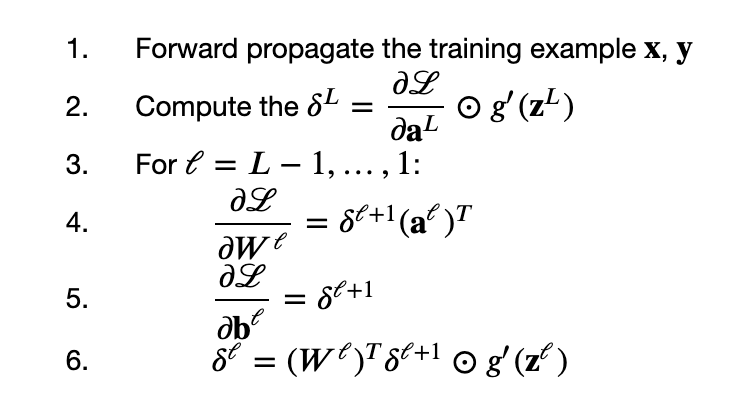

In [34]:
# Neural Network Tests - Forward Propagation
# PLEASE NOTE: These sample tests are only indicative and are added to help you debug your code

mock_X = np.array([[-0.4838731, 0.08083195], [0.93456167, -0.50316134]])
np.random.seed(42)  ## DO NOT CHANGE THE SEED VALUE HERE
nn1 = Network([2,3,2])
nn1.forward_prop(mock_X)                 
                 
a = np.array([[0.],[0.]])
b = np.array([[ 2.08587849, -0.31681043],[-0.94835809,  0.15999031],[-0.04793409,  0.92471859]])
c = np.array([[ 0.24259536,  0.0874714 ],[-2.41978734, -1.98990137]])
forward_z = [a, b, c]

In [35]:
# Neural Network Tests - Backward Propagation
# PLEASE NOTE: These sample tests are only indicative and are added to help you debug your code

mock_y = 0 * mock_X + 1
np.random.seed(42)  ## DO NOT CHANGE THE SEED VALUE HERE
nn1.back_prop(mock_X, mock_y)

backward_w = [[-0.23413696, 1.57921282], [ 0.76743473, -0.46947439], [ 0.54256004, -0.46341769]]

pred = nn1.W[0]
true = backward_w


1
0


In [57]:
# a91138254 Leonardo Clemente

def relu(x):
    output = []
    for v in x.ravel():
        output.append(np.max([0,v]))
    output = np.array(output).reshape(x.shape)
    return output

def sigmoid(x):
    return 1/(1 + np.exp(-x))


x = np.array([[0,1,0,1], [0,0,1,1]])


W1 = np.array([[1,1], [-1,-1]])
b1 = np.array([[-1,1] for i in range(4)]).T

W2 = np.array([2, 2])
b2 = np.array([-1,-1,-1,-1])


z1 = np.matmul(W1,x)  + b1
h1 = relu(z1)

z2 = np.matmul(W2,h1)  + b2
y = relu(z2)
y


array([1, 0, 0, 1])

In [41]:
+ b1

array([[0, 0],
       [1, 0],
       [0, 1],
       [1, 1]])